In [1]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours

import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

In [2]:

def midpoint(ptA, ptB):
 return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)


image = cv2.imread(r"C:\Users\shiva\OneDrive\Pictures\Screenshots\coin.jpeg")




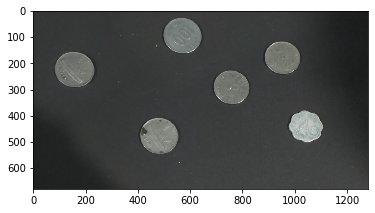

In [3]:
plt.imshow(image)


In [4]:
def size(image):   
    image = imutils.resize(image,width=300, height=500)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    edged = cv2.Canny(gray, 50, 100)
    bordes = edged


    edged = cv2.dilate(edged, None, iterations=1)
    edged = cv2.erode(edged, None, iterations=1)

    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    (cnts, _) = contours.sort_contours(cnts)

    pixelsPerMetric = None
    orig = image.copy()
    for c in cnts:
        if cv2.contourArea(c) < 100:
            continue



        box = cv2.minAreaRect(c)
        box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)

        box = np.array(box, dtype="int")
        box = perspective.order_points(box)

        orig = cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

        for (x, y) in box:
            orig = cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1) 

        (t_l, t_r, b_r, b_l) = box
        (tltrX, tltrY) = midpoint(t_l, t_r)
        (blbrX, blbrY) = midpoint(b_l, b_r)
        (tlblX, tlblY) = midpoint(t_l, b_l)
        (trbrX, trbrY) = midpoint(t_r, b_r)


        Y = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
        X = dist.euclidean((tlblX, tlblY), (trbrX, trbrY)) 

        if pixelsPerMetric is None:
            pixelsPerMetric = X 
        dimY = Y / pixelsPerMetric
        dimX = X / pixelsPerMetric

        cv2.putText(orig, "{:.1f}".format(dimY),(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,0.4, (255, 255, 255), 2)
        cv2.putText(orig, "{:.1f}".format(dimX),(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,0.5, (255, 255, 255), 2)


        
        
    return orig


In [5]:
img =size(image)


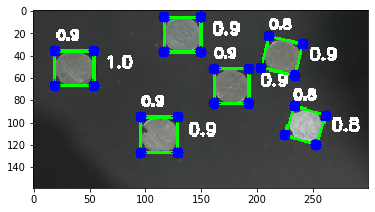

In [6]:
plt.imshow(img);

In [7]:

    windowName = "Live Video Feed"
    cv2.namedWindow(windowName)
    cap = cv2.VideoCapture(0)
    
    if cap.isOpened():
        ret, frame = cap.read()
    else:
        ret = False

    while ret:
    
        ret, frame = cap.read()
        
       
        cv2.imshow(windowName, size(frame))
        #cv2.imshow('dist', dist)
        
        if cv2.waitKey(1) == 27:
            break

    cv2.destroyAllWindows()    

    cap.release()
